# **Dijkstra’s algorithm analysis**

| Class code        | ICC006 |
| :-                | :- |
| **Members**  | 34735 - Ricardo Nieblas Cabrera <br> 34559 - Julián Haniel Ocampo Rodríguez <br> 31480 - Enrique Navarro Payán <br> 34630 - Teodoro González Tellado |
| **Date**          | 24/05/2023 |

### **Project structure** <!-- Add quick links to each section -->

1. [**Introduction**](#1-introduction)
2. [**Pseudocode and asymptotic analysis**](#2-pseudocode-and-asymptotic-analysis)
3. [**Study case**](#3-study-case)
4. [**Dataset characteristics**](#4-dataset-characteristics)
5. [**Implementation**](#5-implementation)

#

### **1. Introduction**

**Graph theory: Transitive closure problem.** Suppose an air-travel network with many airline carriers. Stakeholder interested in knowing: what are the cheapest flights and paths between two locations? What locations are connected by a single airline?

Dijkstra's algorithm was developed by Edsger W. Dijkstra, a dutch computer scientist, in 1956 at the Mathematical Center in Amsterdam, Netherlands. Based on "greedy algorithms" paradigm, this algorithm makes local optimal choices on each step taken so it can find a global optimal solution. The class of problem addressed is the estimation of trajectories. This problem consists of finding the shortest path between two nodes of a graph iteratively. Dijkstra's algorithm was developed for the von Neumann architecture, which is the classical computational model used by most computers today.

<figure> <img src = "img/von_neumann.png" alt = "Von Neumann Arquitecture" width = "400" height = "300"> <figcaption> Von Neumann Arquitecture </figcaption> </figure>

Assuming that all edge weights are positive, the algorithm will have an exact solution. However, if there are negative edge weights, the algorithm will not be able to find the shortest path. If we were to need to have negative edge weights, we would have to use the Bellman-Ford algorithm.

**Time complexity:** It will depend on the implementation of the constructor in the DijkstraDistance superclass. If you use Dijkstra with a priority queue, the complexity would be approximately $ O((V + E) log V) $, since in the worst case you need to update and select vertices with the minimum distance in each iteration of the Dijkstra algorithm.

#

### **2. Pseudocode and asymptotic analysis**

#### **2.1. Functions**

1. [`getSourceData`](#23-getsourcedatav-source)
2. [`getIncomingEdge`](#24-getincomingedgev-source-v-target)
3. [`getIncomingEdgeMap`](#25-getincomingedgemapv-source)
4. [`getPath`](#26-getpathv-source-v-target)
5. [`getIncomingEdgeMap`](#27-getincomingedgemapv-source-int-numdests)

#### **2.2. Data structure elements**

The representation is based on the concept of graphs. In our case, our nodes will have the following elements:

- **A label or identifier:** unique name of a node
- **A set of edges:** The connections between the node and other nodes
- **Cost or distance:** The cost of the connection between the node and other nodes

<figure> <img src = "img/graph_structure.jpeg" alt = "Graph structure" width = "300" height = "200"> <figcaption> Graph structure </figcaption> </figure>

#### **2.3. `getSourceData(V source)`**

**Time complexity:** $ O(1) $

The search in the sourceMap is performed in constant time, since it is based on the source key. The creation of a new SourcePathData object also has constant time complexity.

```java
@Override
protected SourceData getSourceData(V source) {
    SourceData sd = sourceMap.get(source);
    if (sd == null)
        sd = new SourcePathData(source);
    return sd;
}
```

#### **2.4. `getIncomingEdge(V source, V target)`**

**Time complexity:** $ O((V + E) log V) $

The complexity will depend on the performance of singleSourceShortestPath and the operations used within it. If singleSourceShortestPath implements Dijkstra's algorithm with a priority queue, the complexity will be as mentioned previously in the worst case.

```java
public E getIncomingEdge(V source, V target) {
    if (!g.containsVertex(source))
        throw new IllegalArgumentException("Specified source vertex " + 
                source + " is not part of graph " + g);
    
    if (!g.containsVertex(target))
        throw new IllegalArgumentException("Specified target vertex " + 
                target + " is not part of graph " + g);

    Set<V> targets = new HashSet<V>();
    targets.add(target);
    singleSourceShortestPath(source, targets, g.getVertexCount());
    Map<V,E> incomingEdgeMap = 
        ((SourcePathData)sourceMap.get(source)).incomingEdges;
    E incomingEdge = incomingEdgeMap.get(target);
    
    if (!cached)
        reset(source);
    
    return incomingEdge;
}
```

#### **2.5. `getIncomingEdgeMap(V source)`**

**Time complexity:** $ O((V + E) log V) $

Like the previous method, if singleSourceShortestPath uses Dijkstra's algorithm with a priority queue, the complexity will be as previously mentioned in the worst case.

```java
public Map<V,E> getIncomingEdgeMap(V source) {
    return getIncomingEdgeMap(source, g.getVertexCount());
}
```

#### **2.6. `getPath(V source, V target)`**

**Time complexity:** $ O((V + E) log V) $

The complexity depends on the implementation of singleSourceShortestPath and the operations used within it. If Dijkstra's algorithm with a priority queue is used, the complexity will be as mentioned in the worst case.

```java
public List<E> getPath(V source, V target) {
    if(!g.containsVertex(source)) 
        throw new IllegalArgumentException("Specified source vertex " + 
                source + " is not part of graph " + g);
    
    if(!g.containsVertex(target)) 
        throw new IllegalArgumentException("Specified target vertex " + 
                target + " is not part of graph " + g);
    
    LinkedList<E> path = new LinkedList<E>();

    Set<V> targets = new HashSet<V>();
    targets.add(target);
    singleSourceShortestPath(source, targets, g.getVertexCount());
    Map<V,E> incomingEdges = 
        ((SourcePathData)sourceMap.get(source)).incomingEdges;
    
    if (incomingEdges.isEmpty() || incomingEdges.get(target) == null)
        return path;
    V current = target;
    while (!current.equals(source))
    {
        E incoming = incomingEdges.get(current);
        path.addFirst(incoming);
        current = ((Graph<V,E>)g).getOpposite(current, incoming);
    }
    return path;
}
```

#### **2.7. `getIncomingEdgeMap(V source, int numDests)`**

**Time complexity:** $ O((V + E) log V) $

Like the previous method, if singleSourceShortestPath uses Dijkstra's algorithm with a priority queue, the complexity will be as previously mentioned in the worst case.

```java
public LinkedHashMap<V,E> getIncomingEdgeMap(V source, int numDests) {
    if (g.getVertices().contains(source) == false)
        throw new IllegalArgumentException("Specified source vertex " + 
                source + " is not part of graph " + g);

    if (numDests < 1 || numDests > g.getVertexCount())
        throw new IllegalArgumentException("numDests must be >= 1 " + 
        "and <= g.numVertices()");

    singleSourceShortestPath(source, null, numDests);
    
    LinkedHashMap<V,E> incomingEdgeMap = 
        ((SourcePathData)sourceMap.get(source)).incomingEdges;
    
    if (!cached)
        reset(source);
    
    return incomingEdgeMap;        
}
```

#

### **3. Study case**

Our study case will be the implementation of Dijkstra's algorithm in a graph. The graph we are using comes from Stanford's SNAP collection of datasets. More specifically, we are targetting the road networks section of the collection. The dataset we are using is the [California Road Network](https://snap.stanford.edu/data/ca-GrQc.html), containing 1,965,206 nodes and 2,766,607 edges. Intersections and endpoints are represented by nodes and the roads connecting these intersections or road endpoints are represented by undirected edges.

#

### **4. Dataset characteristics**

# **GETTING STARTED...**

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [20]:
import networkx as nx                    # Graph modelling see https://networkx.github.io/
import numpy as np
import json

import pandas as pd                      # Metrics
from abc import ABCMeta, abstractmethod  # Metrics


from sklearn.manifold import TSNE        # Statistical data analysis
from plotly.offline import init_notebook_mode, iplot, plot
import plotly.graph_objs as go

#from sklearn.cluster import DBSCAN       # Clustering
#import hdbscan 
from sklearn.datasets import make_blobs

import matplotlib.pyplot as plt           # Visualization
from matplotlib.pyplot import *
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('GraphTest.csv')

# **METRICS**

In [3]:
data.head(20)

,from,to,weight
0,0,1,8
1,0,2,6
2,0,469,6
3,1,0,0
4,1,6,0
5,1,385,8
6,2,0,6
7,2,3,8
8,469,0,5
9,469,380,3


In [4]:
data.mean()

from      979857.915873
to        979857.915873
weight         4.500547
dtype: float64

In [5]:
data.max()

from      1971280
to        1971280
weight          9
dtype: int64

In [6]:
data.var()

from      3.224220e+11
to        3.224220e+11
weight    8.250451e+00
dtype: float64

In [7]:
data.std()

from      567822.17749
to        567822.17749
weight         2.87236
dtype: float64

In [8]:
data.quantile()

from      977900.5
to        977900.5
weight         5.0
Name: 0.5, dtype: float64

**--------------------------------------    DEGREE    --------------------------------------**

*Degree*

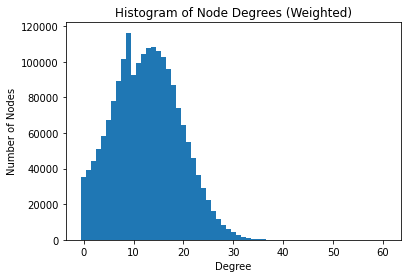

In [9]:
G = nx.Graph()

for index, row in data.iterrows():
    G.add_edge(row['from'], row['to'], weight=row['weight']) # change row names if different

# Calculate degree taking into account weights
degree_dict = dict(G.degree(weight='weight'))

# Histogram of degrees
degrees = list(degree_dict.values())
plt.hist(degrees, bins=range(min(degrees), max(degrees) + 1, 1), align='left')
plt.title('Histogram of Node Degrees (Weighted)')
plt.xlabel('Degree')
plt.ylabel('Number of Nodes')
plt.show()

*Degree Centrality*

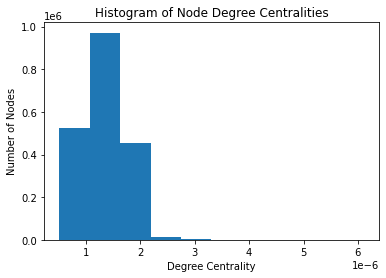

In [10]:
# Calculate degree centrality
centrality_dict = nx.degree_centrality(G)

# Histogram of degree centralities
centralities = list(centrality_dict.values())
plt.hist(centralities)
plt.title('Histogram of Node Degree Centralities')
plt.xlabel('Degree Centrality')
plt.ylabel('Number of Nodes')
plt.show()

*Indegree Centrality WIP*

In [ ]:
G = nx.Graph()
for index, row in data.iterrows():
    G.add_edge(row['from'], row['to'], weight=row['weight']) # change row names if different

# Calculate indegree centrality
indegree_centrality_dict = nx.in_degree_centrality(G)

indegree_centralities = list(indegree_centrality_dict.values())
plt.hist(indegree_centralities)
plt.title('Histogram of Node Indegree Centralities')
plt.xlabel('Indegree Centrality')
plt.ylabel('Number of Nodes')
plt.show()

*Outdegree Centrality*

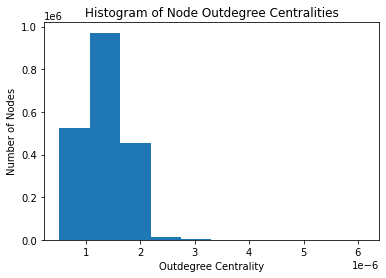

In [11]:
G = nx.DiGraph()

for index, row in data.iterrows():
    G.add_edge(row['from'], row['to'], weight=row['weight']) # change row names if different

# Calculate outdegree centrality
outdegree_centrality_dict = nx.out_degree_centrality(G)

outdegree_centralities = list(outdegree_centrality_dict.values())
plt.hist(outdegree_centralities)
plt.title('Histogram of Node Outdegree Centralities')
plt.xlabel('Outdegree Centrality')
plt.ylabel('Number of Nodes')
plt.show()

*Betweenness Centrality*

In [ ]:
G = nx.DiGraph()

for index, row in data.iterrows():
    G.add_edge(row['from'], row['to'], weight=row['weight']) # change row names if different

# Calculate betweenness centrality
betweenness_centrality_dict = nx.betweenness_centrality(G, k=1000, weight='weight')

# Histogram of betweenness centralities
betweenness_centralities = list(betweenness_centrality_dict.values())
plt.hist(betweenness_centralities)
plt.title('Histogram of Node Betweenness Centralities')
plt.xlabel('Betweenness Centrality')
plt.ylabel('Number of Nodes')
plt.show()

*Closeness Centrality*

In [ ]:
G = nx.Graph()

for index, row in data.iterrows():
    G.add_edge(row['from'], row['to'], weight=row['weight']) # change row names if different

# Calculate closeness centrality
closeness_centrality_dict = nx.closeness_centrality(G, distance='weight')

# Histogram of closeness centralities
closeness_centralities = list(closeness_centrality_dict.values())
plt.hist(closeness_centralities)
plt.title('Histogram of Node Closeness Centralities')
plt.xlabel('Closeness Centrality')
plt.ylabel('Number of Nodes')
plt.show()

*Local Reaching Centrality*

In [ ]:
G = nx.DiGraph()

for index, row in data.iterrows():
    G.add_edge(row['from'], row['to'], weight=row['weight']) # change row names if different

# Calculate local reaching centrality
def local_reaching_centrality(G, node):
    return len(G.successors(node))/len(G.nodes())

lrc_dict = {node: local_reaching_centrality(G, node) for node in G.nodes()}

# Histogram of local reaching centralities
lrc_values = list(lrc_dict.values())
plt.hist(lrc_values)
plt.title('Histogram of Node Local Reaching Centralities')
plt.xlabel('Local Reaching Centrality')
plt.ylabel('Number of Nodes')
plt.show()

*Katz Centrality*

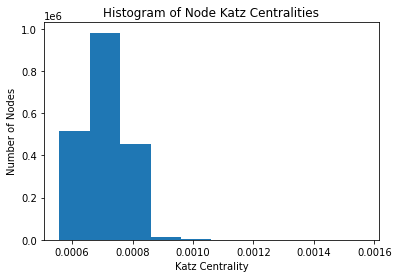

In [14]:
G = nx.DiGraph()

for index, row in data.iterrows():
    G.add_edge(row['from'], row['to'], weight=row['weight']) # change row names if different

# Calculate Katz centrality
# Set the attenuation factor to a small value, say 0.1. It must be less than 1 over the absolute value of the largest eigenvalue of the adjacency matrix.
katz_centrality_dict = nx.katz_centrality(G, 0.1)

# Histogram of Katz centralities
katz_centralities = list(katz_centrality_dict.values())
plt.hist(katz_centralities)
plt.title('Histogram of Node Katz Centralities')
plt.xlabel('Katz Centrality')
plt.ylabel('Number of Nodes')
plt.show()

*Weight and Strenght*

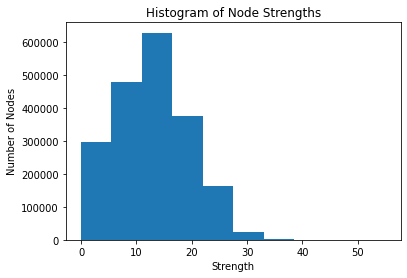

In [15]:
G = nx.DiGraph()

for index, row in data.iterrows():
    G.add_edge(row['from'], row['to'], weight=row['weight']) # change row names if different

# Calculate strength
strength_dict = {node: sum([d['weight'] for n, d in G[node].items()]) for node in G.nodes()}

# Plot histogram of node strengths
strength_values = list(strength_dict.values())
plt.hist(strength_values)
plt.title('Histogram of Node Strengths')
plt.xlabel('Strength')
plt.ylabel('Number of Nodes')
plt.show()

*PageRank*

In [ ]:
G = nx.DiGraph()

for index, row in data.iterrows():
    G.add_edge(row['from'], row['to'], weight=row['weight']) # change row names if different

# Calculate PageRank
pagerank_dict = nx.pagerank(G, alpha=0.85)

# Histogram of PageRank values
pagerank_values = list(pagerank_dict.values())
plt.hist(pagerank_values, bins=100)
plt.title('Histogram of Node PageRank')
plt.xlabel('PageRank')
plt.ylabel('Number of Nodes')
plt.show()

*HITS*

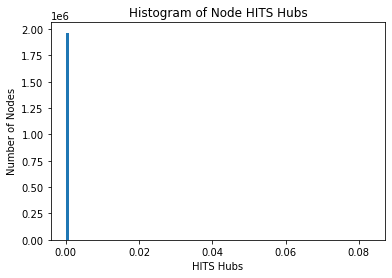

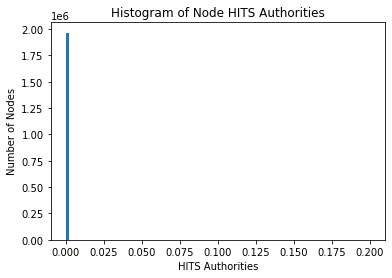

In [16]:
G = nx.DiGraph()

for index, row in data.iterrows():
    G.add_edge(row['from'], row['to'], weight=row['weight']) # change row names if different

# Calculate HITS
hits_hubs, hits_auth = nx.hits(G, max_iter=100)

# Histogram of HITS hubs
hits_hubs_values = list(hits_hubs.values())
plt.hist(hits_hubs_values, bins=100)
plt.title('Histogram of Node HITS Hubs')
plt.xlabel('HITS Hubs')
plt.ylabel('Number of Nodes')
plt.show()

# Histogram of HITS authorities
hits_auth_values = list(hits_auth.values())
plt.hist(hits_auth_values, bins=100)
plt.title('Histogram of Node HITS Authorities')
plt.xlabel('HITS Authorities')
plt.ylabel('Number of Nodes')
plt.show()

**--------------------------------------    CLUSTERING    --------------------------------------**

*Clustering Coefficient*

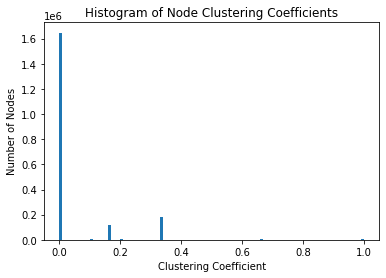

In [17]:
G = nx.DiGraph()

for index, row in data.iterrows():
    G.add_edge(row['from'], row['to'], weight=row['weight']) # change row names if different

# For clustering coefficient, we will consider the undirected version of the graph
G_undirected = G.to_undirected()

# Calculate clustering coefficient
clustering_coefficient_dict = nx.clustering(G_undirected)

# Histogram of clustering coefficients
clustering_coefficient_values = list(clustering_coefficient_dict.values())
plt.hist(clustering_coefficient_values, bins=100)
plt.title('Histogram of Node Clustering Coefficients')
plt.xlabel('Clustering Coefficient')
plt.ylabel('Number of Nodes')
plt.show()

*Weighted Clustering Coefficient*

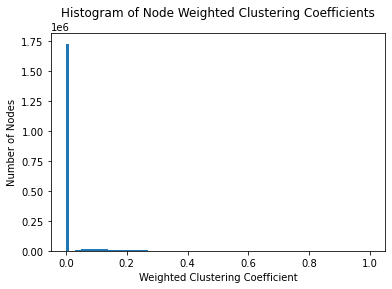

In [18]:
G = nx.DiGraph()

for index, row in data.iterrows():
    G.add_edge(row['from'], row['to'], weight=row['weight']) # change row names if different

# For clustering coefficient, we will consider the undirected version of the graph
G_undirected = G.to_undirected()

# Calculate weighted clustering coefficient
weighted_clustering_coefficient_dict = nx.clustering(G_undirected, weight='weight')

# Histogram of weighted clustering coefficients
weighted_clustering_coefficient_values = list(weighted_clustering_coefficient_dict.values())
plt.hist(weighted_clustering_coefficient_values, bins=100)
plt.title('Histogram of Node Weighted Clustering Coefficients')
plt.xlabel('Weighted Clustering Coefficient')
plt.ylabel('Number of Nodes')
plt.show()

*K-Nearest-Neighbor*

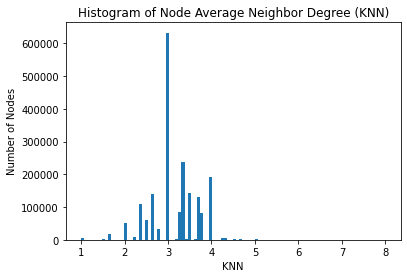

In [22]:
G = nx.DiGraph()

for index, row in data.iterrows():
    G.add_edge(row['from'], row['to'], weight=row['weight']) # change row names if different

# Calculate average neighbor degree
knn_dict = nx.average_neighbor_degree(G)

# Histogram of average neighbor degrees
knn_values = list(knn_dict.values())
plt.hist(knn_values, bins=100)
plt.title('Histogram of Node Average Neighbor Degree (KNN)')
plt.xlabel('KNN')
plt.ylabel('Number of Nodes')
plt.show()

*Weighted K-Nearest-Neighbor*

C:\Users\kikin\AppData\Local\Temp\ipykernel_32924\2835405372.py:14: RuntimeWarning:

invalid value encountered in longlong_scalars



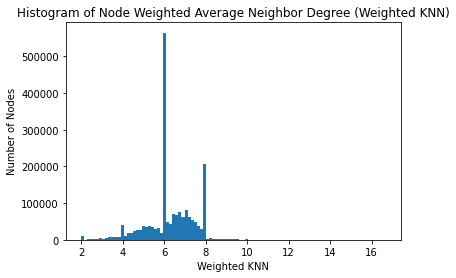

In [23]:
G = nx.DiGraph()

for index, row in data.iterrows():
    G.add_edge(row['from'], row['to'], weight=row['weight']) # change row names if different

# Calculate weighted average neighbor degree
weighted_knn_dict = {}
for node in G.nodes:
    weights = [data['weight'] for data in G[node].values()]
    degrees = [G.degree(neighbor) for neighbor in G[node]]
    if weights:
        weighted_knn_dict[node] = sum(weight*degree for weight, degree in zip(weights, degrees))/sum(weights)
    else:
        weighted_knn_dict[node] = 0

# Histogram of weighted average neighbor degrees
weighted_knn_values = list(weighted_knn_dict.values())
plt.hist(weighted_knn_values, bins=100)
plt.title('Histogram of Node Weighted Average Neighbor Degree (Weighted KNN)')
plt.xlabel('Weighted KNN')
plt.ylabel('Number of Nodes')
plt.show()

**--------------------------------------    NETWORK LEVEL PROPERTIES    --------------------------------------**

*Degree Assortativity Coefficient*

In [24]:
G = nx.DiGraph()

for index, row in data.iterrows():
    G.add_edge(row['from'], row['to'], weight=row['weight']) # change row names if different

# Calculate degree assortativity coefficient
degree_assortativity_coefficient = nx.degree_assortativity_coefficient(G)

print(f'Degree Assortativity Coefficient: {degree_assortativity_coefficient}')

Degree Assortativity Coefficient: 0.12604167267908703


*Diameter*

In [25]:
G = nx.DiGraph()

for index, row in data.iterrows():
    G.add_edge(row['from'], row['to'], weight=row['weight']) # change row names if different

# For diameter, we will consider the undirected version of the graph
G_undirected = G.to_undirected()

# Calculate diameter (Note: This can be time-consuming and memory-intensive for large graphs)
try:
    diameter = nx.diameter(G_undirected)
    print(f'The diameter of the graph is {diameter}')
except:
    print('The graph is not connected. Diameter is undefined.')

The graph is not connected. Diameter is undefined.


*Global Reaching Centrality*

In [ ]:
G = nx.DiGraph()

for index, row in data.iterrows():
    G.add_edge(row['from'], row['to'], weight=row['weight']) # change row names if different

# Calculate global reaching centrality (This can be time-consuming and memory-intensive for large graphs)
N = len(G)
global_reaching_centrality = {}
for node in G.nodes:
    s = sum(nx.shortest_path_length(G, node, t) for t in G.nodes if t != node)
    global_reaching_centrality[node] = (N-1)/s

# Printing the top 5 nodes with the highest global reaching centrality
sorted_global_reaching_centrality = sorted(global_reaching_centrality.items(), key=lambda x: x[1], reverse=True)
print(sorted_global_reaching_centrality[:5])

*Transitivity*

In [27]:
G = nx.DiGraph()

for index, row in data.iterrows():
    G.add_edge(row['from'], row['to'], weight=row['weight']) # change row names if different

# Calculate transitivity
transitivity = nx.transitivity(G)

print(f'Transitivity: {transitivity}')

Transitivity: 0.06038741703627468


*Longest Path Length*

In [28]:
G = nx.DiGraph()

for index, row in data.iterrows():
    G.add_edge(row['from'], row['to'], weight=row['weight']) # change row names if different

# Check if the graph is a Directed Acyclic Graph (DAG)
if nx.is_directed_acyclic_graph(G):
    # Calculate the longest path length
    longest_path_length = nx.dag_longest_path_length(G)
    print(f'The longest path length in the graph is {longest_path_length}')
else:
    print('The graph is not a Directed Acyclic Graph (DAG).')

The graph is not a Directed Acyclic Graph (DAG).


*Average Degree*

In [29]:
# Create a directed graph
G = nx.DiGraph()

for index, row in data.iterrows():
    G.add_edge(row['from'], row['to'], weight=row['weight']) # change row names if different

# Calculate average degree
average_in_degree = sum(d for n, d in G.in_degree()) / float(len(G))
average_out_degree = sum(d for n, d in G.out_degree()) / float(len(G))

print(f'Average in-degree: {average_in_degree}')
print(f'Average out-degree: {average_out_degree}')

Average in-degree: 2.8155898160294646
Average out-degree: 2.8155898160294646


*Cycles*

In [ ]:
# Create a directed graph
G = nx.DiGraph()

for index, row in data.iterrows():
    G.add_edge(row['from'], row['to'], weight=row['weight']) # change row names if different

# Find cycles (This can be time-consuming and memory-intensive for large graphs)
cycles = list(nx.simple_cycles(G))

# Print the number of cycles
print(f'Number of cycles: {len(cycles)}')

*Implementation*

In [1]:
import csv
import networkx as nx
import matplotlib.pyplot as plt

# Creates an empty graph
G = nx.Graph()

# Reads the CSV and add edges to the graph
with open('GraphTest.csv') as f:
    reader = csv.reader(f)
    next(reader)  # Skip the header row
    for row in reader:
        source = row[0]
        target = row[1]
        weight = float(row[2])
        G.add_edge(source, target, weight=weight)

# The starting and target nodes
start_node = '0'
target_node = '845'

# Runs Dijkstra's algorithm
path = nx.dijkstra_path(G, start_node, target_node)

# Prints the shortest path
print(path)

# Gets the length of the shortest path
length = nx.dijkstra_path_length(G, start_node, target_node)

# Prints the length
print(length)

['0', '1', '6', '5', '4', '98', '470', '410', '405', '404', '333', '332', '35734', '35731', '35693', '35694', '35452', '35451', '35689', '35440', '35943', '3255', '29', '30', '31', '3246', '2203', '2146', '2147', '2148', '2119', '2120', '2121', '2122', '3109', '3140', '3138', '3139', '3117', '3112', '2077', '4415', '4414', '41890', '670', '671', '109344', '109343', '109359', '109361', '109362', '109364', '109367', '784', '770', '781', '785', '832', '831', '845']
183.0


In [2]:
import networkx, pandas, numpy

nodes = list(range(100))

df1 = pandas.DataFrame({'from':   numpy.random.choice(nodes, 100),
                        'to':     numpy.random.choice(nodes, 100),
                        'weight': numpy.random.choice(nodes, 100)
                        })

df = pandas.read_csv('GraphTest.csv')
df = df.rename({'2': 'from', '1': 'to', '9': 'weight'}, axis = 1)

Graph = networkx.from_pandas_edgelist(df, source = 'from', target = 'to', edge_attr = 'weight')

pos = networkx.spring_layout(Graph, k = 10)
networkx.draw_networkx(Graph, pos, with_labels = True)
labels = {e: Graph.edges[e]['weight'] for e in Graph.edges}
networkx.draw_networkx_edge_labels(Graph, pos, edge_labels = labels)

ModuleNotFoundError: No module named 'scipy'